Default RF accuracy (n_estimators=10): 1.0000
Best score: 1.0000 with n_estimators = 1


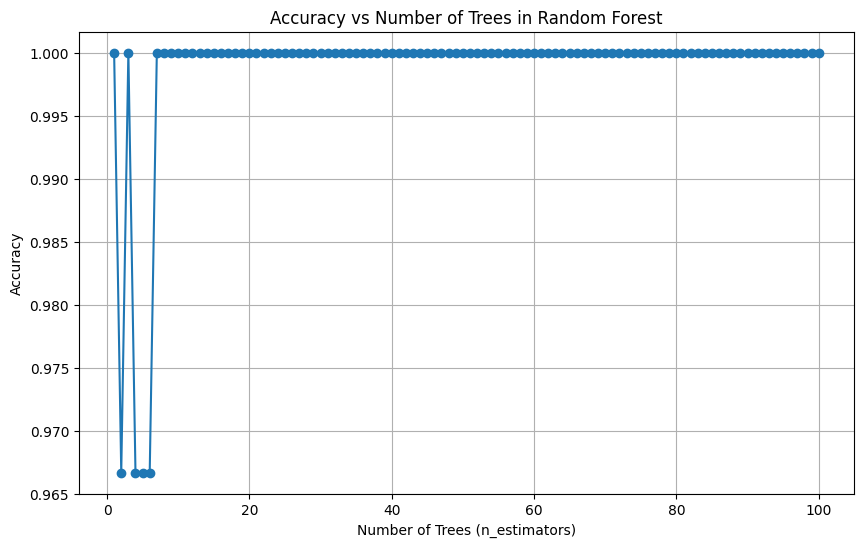

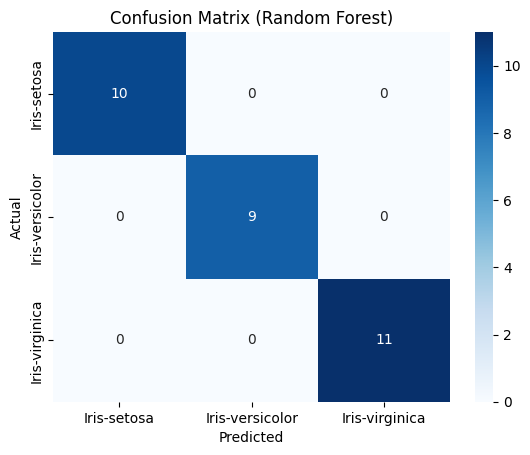

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/iris.csv")

# Separate features and target
X = df.drop(columns=['species'])  # Make sure 'species' is the name of the target column
y = df['species']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest with default n_estimators=10
rf_default = RandomForestClassifier(n_estimators=10, random_state=42)
rf_default.fit(X_train, y_train)
y_pred_default = rf_default.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)
print(f"Default RF accuracy (n_estimators=10): {accuracy_default:.4f}")

# Fine-tuning n_estimators
scores = []
tree_range = range(1, 101)

for n in tree_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

best_n = tree_range[scores.index(max(scores))]
best_score = max(scores)
print(f"Best score: {best_score:.4f} with n_estimators = {best_n}")

# Plot Accuracy vs Number of Trees
plt.figure(figsize=(10, 6))
plt.plot(tree_range, scores, marker='o')
plt.title('Accuracy vs Number of Trees in Random Forest')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


from sklearn.metrics import confusion_matrix
import seaborn as sns

# Train best model again
best_rf = RandomForestClassifier(n_estimators=best_n, random_state=42)
best_rf.fit(X_train, y_train)
y_pred_best = best_rf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_rf.classes_, yticklabels=best_rf.classes_)
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
